# Stock Kurtosis Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2016-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD'

In [3]:
df = yf.download("AMD", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
def kurtosis(returns):
    stock_kurtosis = returns.kurtosis()
    return stock_kurtosis

Text(0, 0.5, 'Kurtosis')

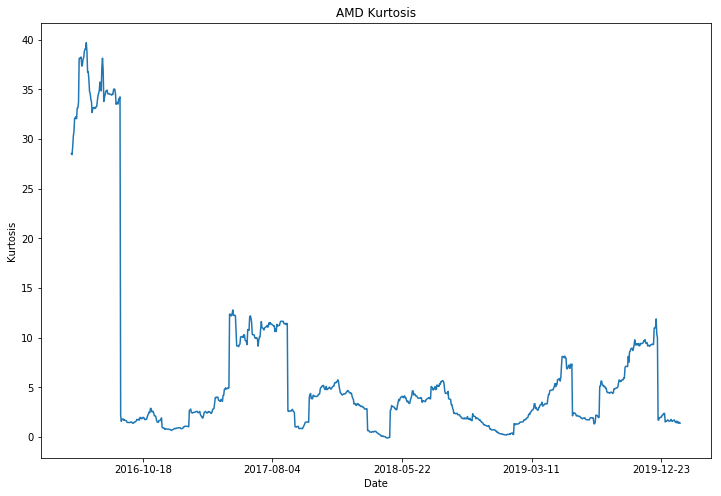

In [6]:
# Compute the running kurtosis
running = [kurtosis(returns[i-90:i]) for i in range(90, len(returns))]

# Plot running kurtosis up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Kurtosis')
plt.xlabel('Date')
plt.ylabel('Kurtosis')

In [7]:
kt = kurtosis(returns)
kt

23.49501986703233

In [8]:
running = [kurtosis(returns[i-90:i]) for i in range(90, len(returns))]
running

[28.537259417346007,
 28.442263184229553,
 29.187299371864974,
 30.288589115670995,
 30.787442372412613,
 32.1113372048433,
 32.06905705760566,
 32.26188870855905,
 32.05602647521136,
 33.1201138358848,
 33.14090810871601,
 33.685611844948156,
 38.116465770056465,
 38.15629454300511,
 38.21733301614364,
 38.26064739726727,
 37.34489205497327,
 37.46323137056151,
 38.059888176475766,
 38.20136780278762,
 38.81860825418949,
 39.06799863799655,
 39.07700597504266,
 39.70912973216995,
 38.79241261293525,
 36.74783620425036,
 36.76398652656321,
 35.99087076835601,
 34.79746965554405,
 34.602964086259334,
 34.0054024150329,
 33.7764429501014,
 32.671793642873084,
 33.06576508796917,
 33.159760913923975,
 33.18961136763537,
 33.08485241040092,
 33.10283496569867,
 33.257834160873756,
 33.271630531794045,
 33.86342519095643,
 34.36285981005408,
 34.59721807464747,
 34.857596964761186,
 35.746307416779345,
 34.93963168784224,
 34.85956078261477,
 37.20085490813201,
 38.14695560651725,
 36.93157